In [1]:
import numpy as np  
import pandas as pd  
import re  
import string
import nltk
import matplotlib.pyplot as plt
import wordcloud

from nltk import word_tokenize
#from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
#from pymystem3 import Mystem
from wordcloud import WordCloud  
from PIL import Image

from PIL import Image
from scipy.spatial import distance

nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v.kozlovskiy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
lemmatizer = WordNetLemmatizer() # lemmatizer for english words
#m = Mystem()

In [3]:
# open file
path = 'C:/Users/v.kozlovskiy/Desktop/DATAS/from_aug24/_ekklesiat_wc_and_other/to_git/'
f = open(path + 'ecclesiastes_kohelet_eng2.txt', 'r', encoding='utf8')
text = f.read()  
text

"\ufeff1:1 The words of the Preacher, the son of David, king in Jerusalem.\n1:2 Vanity of vanities, saith the Preacher, vanity of vanities; all is vanity.\n1:3 What profit hath a man of all his labour which he taketh under the sun? \n1:4 One generation passeth away, and another generation cometh: but the earth abideth for ever.\n1:5 The sun also ariseth, and the sun goeth down, and hasteth to his place where he arose.\n1:6 The wind goeth toward the south, and turneth about unto the north; it whirleth about continually, and the wind returneth again according to his circuits.\n1:7 All the rivers run into the sea; yet the sea is not full; unto the place from whence the rivers come, thither they return again.\n1:8 All things are full of labour; man cannot utter it: the eye is not satisfied with seeing, nor the ear filled with hearing.\n1:9 The thing that hath been, it is that which shall be; and that which is done is that which shall be done: and there is no new thing under the sun.\n1:10 

f = open(path + 'ecclesiastes_rus.txt', 'r', encoding='utf8')
text = f.read()
text

In [4]:
process = text
process

"\ufeff1:1 The words of the Preacher, the son of David, king in Jerusalem.\n1:2 Vanity of vanities, saith the Preacher, vanity of vanities; all is vanity.\n1:3 What profit hath a man of all his labour which he taketh under the sun? \n1:4 One generation passeth away, and another generation cometh: but the earth abideth for ever.\n1:5 The sun also ariseth, and the sun goeth down, and hasteth to his place where he arose.\n1:6 The wind goeth toward the south, and turneth about unto the north; it whirleth about continually, and the wind returneth again according to his circuits.\n1:7 All the rivers run into the sea; yet the sea is not full; unto the place from whence the rivers come, thither they return again.\n1:8 All things are full of labour; man cannot utter it: the eye is not satisfied with seeing, nor the ear filled with hearing.\n1:9 The thing that hath been, it is that which shall be; and that which is done is that which shall be done: and there is no new thing under the sun.\n1:10 

In [5]:
# text lower and split by separate strings
text_lower_by_sent = process.lower().split('\n')
text_lower_by_sent[:5]

['\ufeff1:1 the words of the preacher, the son of david, king in jerusalem.',
 '1:2 vanity of vanities, saith the preacher, vanity of vanities; all is vanity.',
 '1:3 what profit hath a man of all his labour which he taketh under the sun? ',
 '1:4 one generation passeth away, and another generation cometh: but the earth abideth for ever.',
 '1:5 the sun also ariseth, and the sun goeth down, and hasteth to his place where he arose.']

In [6]:
# function for text filtration and lemmatization
def filtration(text):
  text = ''.join(lemmatizer.lemmatize(text))
  text = re.sub(r'[^a-z\']', ' ', text)
  text = text.split()
  print('ok') # check
  return ' '.join(text)

In [7]:
%time
text_lower_by_sent_proc = [filtration(i) for i in text_lower_by_sent]
text_lower_by_sent_proc[:5]

CPU times: total: 0 ns
Wall time: 0 ns
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok


['the words of the preacher the son of david king in jerusalem',
 'vanity of vanities saith the preacher vanity of vanities all is vanity',
 'what profit hath a man of all his labour which he taketh under the sun',
 'one generation passeth away and another generation cometh but the earth abideth for ever',
 'the sun also ariseth and the sun goeth down and hasteth to his place where he arose']

In [8]:
# join lemmatized text for wordcloud
union = ' '.join(text_lower_by_sent_proc)
union

"the words of the preacher the son of david king in jerusalem vanity of vanities saith the preacher vanity of vanities all is vanity what profit hath a man of all his labour which he taketh under the sun one generation passeth away and another generation cometh but the earth abideth for ever the sun also ariseth and the sun goeth down and hasteth to his place where he arose the wind goeth toward the south and turneth about unto the north it whirleth about continually and the wind returneth again according to his circuits all the rivers run into the sea yet the sea is not full unto the place from whence the rivers come thither they return again all things are full of labour man cannot utter it the eye is not satisfied with seeing nor the ear filled with hearing the thing that hath been it is that which shall be and that which is done is that which shall be done and there is no new thing under the sun is there any thing whereof it may be said see this is new it hath been already of old t

In [9]:
# make dataframe for task with cousine distance
text_df = pd.DataFrame({'original': text_lower_by_sent, 'processed': text_lower_by_sent_proc})
text_df.to_excel(path + 'text_for_analysis_eng.xlsx', index=False)
text_df.head(3)

,original,processed
0,"﻿1:1 the words of the preacher, the son of dav...",the words of the preacher the son of david kin...
1,"1:2 vanity of vanities, saith the preacher, va...",vanity of vanities saith the preacher vanity o...
2,1:3 what profit hath a man of all his labour w...,what profit hath a man of all his labour which...


In [10]:
### alterantive way without re
#import string
#print(string.punctuation)
#spec_chars = string.punctuation + '\n\xa0«»\t—…'

#def remove_chars_from_text(text, chars):
#    return "".join([ch for ch in text if ch not in chars])

#a = remove_chars_from_text(a, spec_chars)
#a = remove_chars_from_text(a, string.digits)
#a

In [11]:
# tokenziation for wordcloud
text_tokens = word_tokenize(union)
text_tokens[:5]

['the', 'words', 'of', 'the', 'preacher']

In [12]:
# add stopwords with extend
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'все', 'вс'])
english_stopwords = stopwords.words("english")

In [13]:
# clear stopwords
text_tokens = [token.strip() for token in text_tokens if token not in english_stopwords]
text_tokens[:5]

['words', 'preacher', 'son', 'david', 'king']

In [14]:
# final text_raw for wordcloud
text_raw = " ".join(text_tokens)
text_raw

"words preacher son david king jerusalem vanity vanities saith preacher vanity vanities vanity profit hath man labour taketh sun one generation passeth away another generation cometh earth abideth ever sun also ariseth sun goeth hasteth place arose wind goeth toward south turneth unto north whirleth continually wind returneth according circuits rivers run sea yet sea full unto place whence rivers come thither return things full labour man utter eye satisfied seeing ear filled hearing thing hath shall done shall done new thing sun thing whereof may said see new hath already old time us remembrance former things neither shall remembrance things come shall come preacher king israel jerusalem gave heart seek search wisdom concerning things done heaven sore travail hath god given sons man exercised therewith seen works done sun behold vanity vexation spirit crooked made straight wanting numbered communed mine heart saying lo come great estate gotten wisdom jerusalem yea heart great experien

<function matplotlib.pyplot.show(close=None, block=None)>

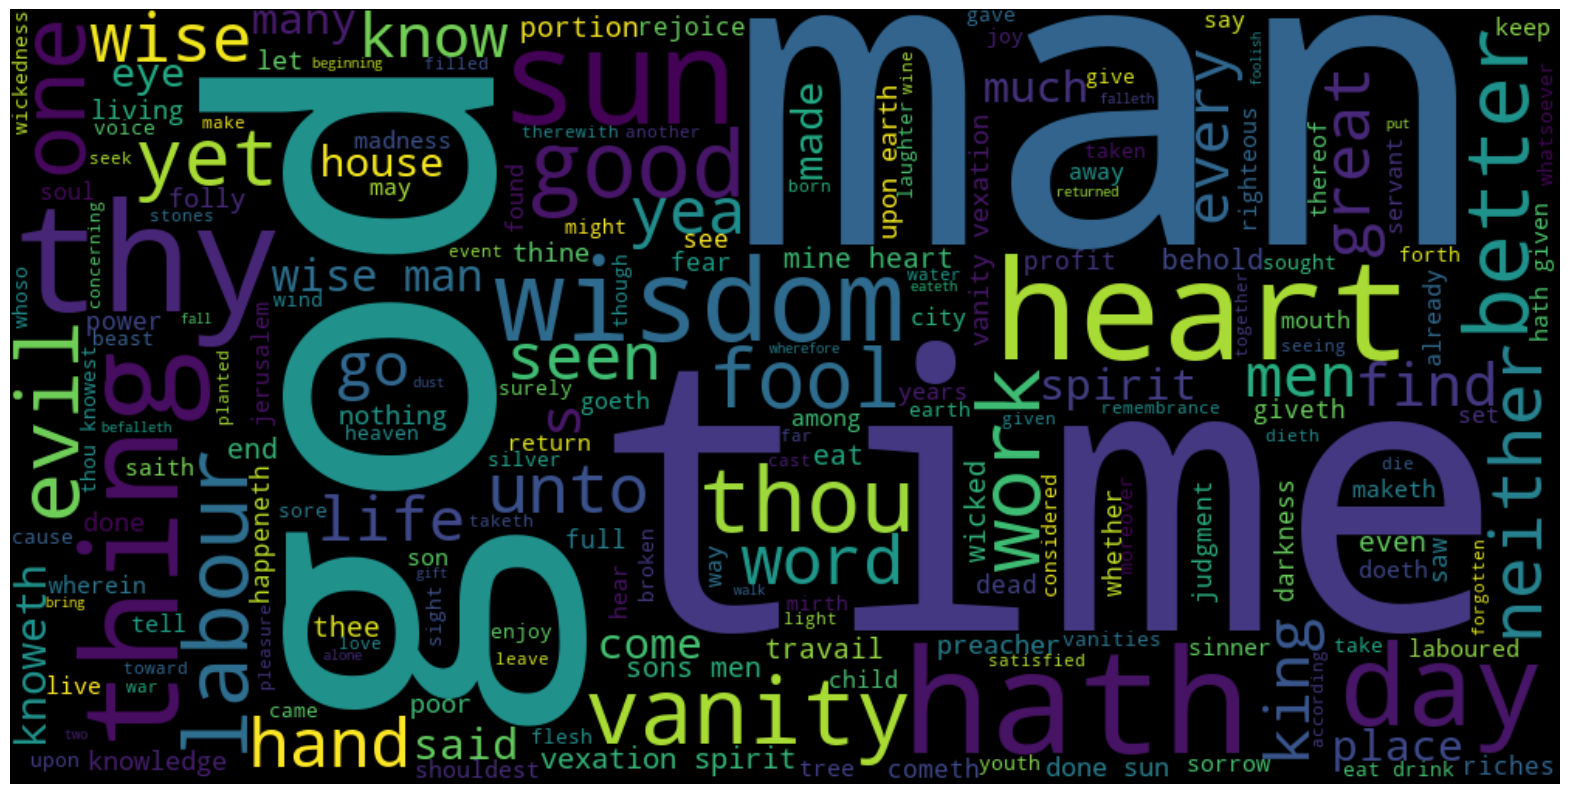

In [15]:
# simple wordcloud
plt.figure(figsize=(20,20))
WC=WordCloud(width=1000,height=500,max_words=200, min_font_size=5)
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path + 'worldcloud_eng_01.jpg')
plt.show

In [16]:
# wordcloud with mask
from PIL import Image
original_image = Image.open(path + 'fortress2.jpg')
#image = original_image.resize([1500,1000])
image = original_image
image = image.convert("L")
threshold = 100
image = image.point(
    lambda x: 255 if x > threshold else 0
)
image.show()

image = np.array(image)
image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

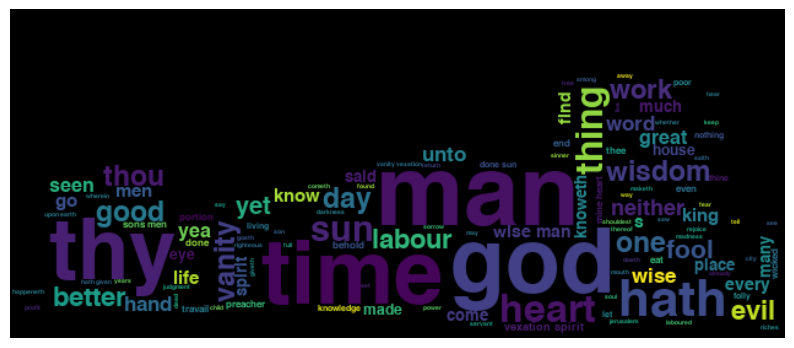

In [17]:
plt.figure(figsize=(10,10))
WC=WordCloud(font_path=path + 'Helvetica-Bold.ttf',
    width=original_image.size[0],height=original_image.size[1],max_words=500, min_font_size=5, mask=image, background_color='black')
cloud=WC.generate(text_raw)
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig(path + 'worldcloud_eng_02_mask.jpg')
plt.show

In [18]:
#  wordcloud with transparanse backgroud combination with other image
 
background_image = Image.open(path + 'fortress2.jpg').convert("RGBA")
#background_image = background_image.resize([1500, 1000])

#mask_image = Image.open(path + 'fortress2.jpg')
#mask_image = mask_image.resize(background_image.size)
mask_image = background_image.convert("L")
threshold = 150
mask_image = mask_image.point(
    lambda x: 255 if x > threshold else 0
)
image = np.array(mask_image)

WC=WordCloud(font_path=path + 'Helvetica.ttf',
    width=background_image.size[0],height=background_image.size[1],max_words=500, min_font_size=5, mask=image, background_color=None, mode='RGBA')#, colormap='gist_yarg_r')#background_color='#D1D1D1')
cloud=WC.generate(text_raw)

wc_image = cloud.to_image()
#wc_image = wc_image.resize(background_image.size)
combined_image = Image.alpha_composite(background_image, wc_image)
combined_image.save(path + 'worldcloud_eng_03_transparense_with_back.png')

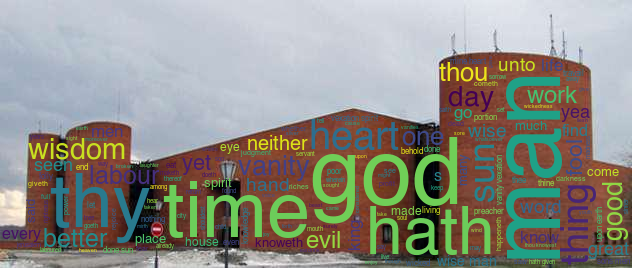

In [19]:
combined_image